  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 36.7 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 36.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Chargement des données nettoyées...
Données chargées: (91031, 15)

Suppression des outliers...
Détection d'outliers dans 'price':
Q1: 121.0, Q3: 187.0, IQR: 66.0
Limites: [22.0, 286.0]
Nombre d'outliers: 11991
Données après suppression des outliers: (79040, 15)


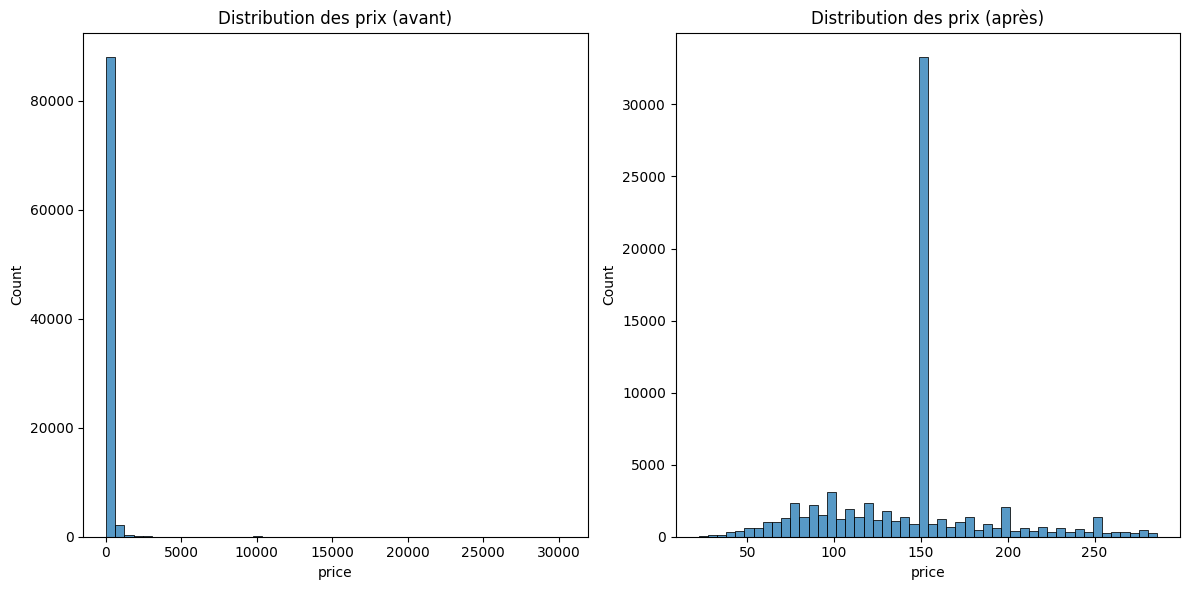


Encodage des variables catégorielles...
Colonnes catégorielles sélectionnées pour encodage: ['room_type', 'property_type', 'neighbourhood_cleansed']
Données après encodage: (79040, 100)
Nombre de nouvelles colonnes créées: 88
Exemples de nouvelles colonnes: ['neighbourhood_cleansed_Palais-Bourbon', 'property_type_Shared room in rental unit', 'neighbourhood_cleansed_Ménilmontant', 'property_type_Tiny home', 'property_type_Private room in vacation home']...

Division des données...

Sauvegarde des ensembles de données...
Ensembles de données sauvegardés dans ../data/splits
Train: (63232, 100), Test: (15808, 100)

Prétraitement terminé!


In [2]:
# Notebook corrigé 02_data_preprocessing.ipynb
# Install missing packages
%pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ajouter le dossier parent au chemin pour importer les modules
sys.path.append('..')

# Recharger les modules pour prendre en compte les modifications
import importlib
if 'src.data_preprocessing' in sys.modules:
    importlib.reload(sys.modules['src.data_preprocessing'])

# Vérifier si le fichier de données nettoyées existe
cleaned_file_path = "../data/processed/paris_listings_cleaned.csv"
if not os.path.exists(cleaned_file_path):
    print("Le fichier de données nettoyées n'existe pas, exécution du prétraitement...")
    # Importer et exécuter le script de prétraitement
    from src.data_preprocessing import preprocess_data
    preprocess_data("../data/raw/listings.csv", "../data/processed/paris_listings_cleaned.csv")
    print("Prétraitement terminé, fichier créé.")

# Maintenant nous pouvons charger le fichier qui a été créé
print("Chargement des données nettoyées...")
df = pd.read_csv("../data/processed/paris_listings_cleaned.csv")
print(f"Données chargées: {df.shape}")

# Maintenant importer les modules nécessaires
from src.data_preprocessing import remove_outliers
from src.feature_engineering import encode_categorical
from src.utils import split_data, save_splits

# 1. Suppression des outliers pour le prix
print("\nSuppression des outliers...")
df_no_outliers = remove_outliers(df, 'price')
print(f"Données après suppression des outliers: {df_no_outliers.shape}")

# Visualiser la distribution avant/après
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50)
plt.title('Distribution des prix (avant)')

plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers['price'], bins=50)
plt.title('Distribution des prix (après)')
plt.tight_layout()
plt.show()

# 2. Encodage des variables catégorielles
print("\nEncodage des variables catégorielles...")
# Sélectionner explicitement les colonnes catégorielles pour éviter d'encoder 'name'
categorical_columns = ['room_type', 'property_type'] 
if 'neighbourhood_cleansed' in df_no_outliers.columns:
    categorical_columns.append('neighbourhood_cleansed')

print(f"Colonnes catégorielles sélectionnées pour encodage: {categorical_columns}")

df_encoded = encode_categorical(df_no_outliers, categorical_columns)
print(f"Données après encodage: {df_encoded.shape}")

# Afficher seulement le nombre et quelques exemples de nouvelles colonnes
new_cols = list(set(df_encoded.columns) - set(df_no_outliers.columns))
print(f"Nombre de nouvelles colonnes créées: {len(new_cols)}")
if len(new_cols) > 5:
    print(f"Exemples de nouvelles colonnes: {new_cols[:5]}...")
else:
    print(f"Nouvelles colonnes: {new_cols}")

# 3. Division en ensembles d'entraînement et de test
print("\nDivision des données...")
os.makedirs("../data/splits", exist_ok=True)
X_train, X_test, y_train, y_test = split_data(df_encoded, 'price')

# 4. Sauvegarde des ensembles
print("\nSauvegarde des ensembles de données...")
save_splits(X_train, X_test, y_train, y_test, output_dir="../data/splits")

print("\nPrétraitement terminé!")